![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

**Asignatura:** *Programación Científica*

**Profesores:**

*   Dr. Juan Bekios Calfa

**Ayudantes**:


**Fecha:** 11 de abril de 2025

---



# Laboratorio 01: Carga y manipulación de archivos de texto

## Descripción del problema:

El estudio del flujo de peatones en un corredor unidireccional es un problema relevante en la planificación urbana y en la gestión de eventos donde grandes grupos de personas transitan por espacios limitados.
Este problema se centra en analizar y entender cómo se mueven los individuos en un espacio lineal y restringido, donde todos se desplazan en la misma dirección. Se busca identificar patrones, calcular velocidades promedio y evaluar cómo la densidad y otros factores afectan la movilidad de los peatones.


## Objetivos:

1. **Cargar los datos:** Utilizar Python para importar los datos de flujo peatonal desde archivos externos.
2. **Procesar los datos de entrada:** Emplear métodos de manipulación de cadenas para extraer y limpiar la información necesaria de los datos brutos.
3. **Organizar los datos:** Usar diccionarios para clasificar los datos por características relevantes como tiempos, velocidades y densidades.
4. **Análisis estadístico:** Calcular estadísticas descriptivas, incluyendo medias y desviaciones estándar, para obtener una comprensión más profunda de las velocidades y comportamientos de los peatones en el corredor.

### Dataset de peatones:

Información general del problema y dataset: https://ped.fz-juelich.de/da/doku.php?id=corridor5

Archivo de texto a procesar (UNI_CORR_500_05): [Descargar aquí](https://ped.fz-juelich.de/experiments/2013.06.19_Duesseldorf_Messe_BaSiGo/result/corrected/UNI_CORR_500_Gregor/traj_UNI_CORR_500_05.txt)


### Procedimiento general del laboratorio:

*  **Datos:** Los datos consistirán en registros temporales de peatones que transitan por un corredor. Cada registro incluirá marcas de tiempo, posiciones y otros posibles atributos como la edad o el género del peatón.
*  **Herramientas de software:** Se utilizará Python como lenguaje de programación principal. El laboratorio utilizará los conceptos de manipulación de strings y diccionarios para la implementación del problema.
*  **Métodos de procesamiento de datos:** Se emplearán técnicas de manipulación de cadenas para limpiar y preparar los datos, y estructuras de datos como listas y diccionarios para su organización y análisis.
*  **Entregables:**  El laboratorio finalizará con la presentación de un archivo colab que incluya gráficos y tablas que resuman los hallazgos estadísticos, así como una discusión sobre las implicaciones de estos resultados para el diseño de infraestructura peatonal.

Este laboratorio busca dotar a los estudiantes o investigadores de las herramientas y métodos necesarios para abordar problemas de ingeniería urbana y de transporte de manera práctica y basada en datos.

# 1. Ejemplo de carga de datos

Estos ejemplos están diseñados para ilustrar los componentes esenciales involucrados en la carga, análisis y visualización de datos, culminando con el cálculo de la velocidad media.

Aunque el ejemplo proporcionado se centra en la carga de datos de una sola persona, se espera que los estudiantes apliquen los conceptos aprendidos para abordar el problema completo tal como se ha planteado.

##1.1 Carga de datos

Se cargarán los datos y se acondicionarán para poder utilizarlos adecuadamente en las fase de análisis.

### 1.1.1 Se monta el disco virtual de google drive.

In [1]:
# Montar unidad virtual desde google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd '/gdrive/MyDrive/COQ-ESC-UCN/Classes/ProgramaciónCientífica/PC-2025-01/Laboratorio/Lab01: Carga y manipulación de archivos'

Mounted at /gdrive
/gdrive/MyDrive/COQ-ESC-UCN/Classes/ProgramaciónCientífica/PC-2025-01/Laboratorio/Lab01: Carga y manipulación de archivos


### 1.1.2 Carga de datos errónea

In [2]:
# Cargar archivo de texto en modo lectura (Con error explicar por qué)
with open('traj_UNI_CORR_500_05.txt', 'r') as archivo:
  # Lee el contenido del archivo
  peatones_txt = archivo.read()

### 1.1.3 Carga de datos por línea

In [3]:
persona_1 = []
# Cargar archivo de texto en modo lectura (Con error explicar por qué)
with open('traj_UNI_CORR_500_05.txt', 'r') as archivo:
  # Leo las primeras cuatro lineas del archivo (Cabecera)
  for i in range(4):
    archivo.readline()

  for t in archivo:
    # Obtengo todos los movimientos de todas las personas en cada frame
    fila_str = t.split()
    id = int(fila_str[0])
    frame = int(fila_str[1])
    x = float(fila_str[2])
    y = float(fila_str[3])
    z = float(fila_str[4])
    # Solo guardo la persona uno
    if id == 1:
      persona_1.append((frame, x, y, z))

print(persona_1)

[(74, -5.5268, 4.2383, 1.76), (75, -5.4471, 4.2452, 1.76), (76, -5.3705, 4.2548, 1.76), (77, -5.2965, 4.2515, 1.76), (78, -5.2246, 4.2578, 1.76), (79, -5.1642, 4.2572, 1.76), (80, -5.1223, 4.2612, 1.76), (81, -5.075, 4.2575, 1.76), (82, -5.0274, 4.246, 1.76), (83, -4.975, 4.2477, 1.76), (84, -4.9091, 4.2394, 1.76), (85, -4.8327, 4.2288, 1.76), (86, -4.764, 4.2127, 1.76), (87, -4.6913, 4.1955, 1.76), (88, -4.6185, 4.1756, 1.76), (89, -4.5577, 4.1619, 1.76), (90, -4.4806, 4.1507, 1.76), (91, -4.4286, 4.1452, 1.76), (92, -4.3771, 4.1422, 1.76), (93, -4.3264, 4.1427, 1.76), (94, -4.2727, 4.145, 1.76), (95, -4.2155, 4.1473, 1.76), (96, -4.152, 4.1498, 1.76), (97, -4.0851, 4.1511, 1.76), (98, -4.0136, 4.1517, 1.76), (99, -3.9384, 4.1541, 1.76), (100, -3.8627, 4.1595, 1.76), (101, -3.7902, 4.1683, 1.76), (102, -3.7241, 4.1799, 1.76), (103, -3.6618, 4.1928, 1.76), (104, -3.6061, 4.203, 1.76), (105, -3.5544, 4.2095, 1.76), (106, -3.5046, 4.213, 1.76), (107, -3.4548, 4.2127, 1.76), (108, -3.403,

##1.2 Mejorar los datos

Ordenar los datos de la persona 1 por número de frame, para poder calcular las distancias y las velocidades.

In [4]:
# Definición de la función que retorna el primer elemento de la tupla
def obtener_frame(tupla):
    return tupla[0]

# Ordenando la lista por el elemento 'frame' usando la función definida
persona_1.sort(key=obtener_frame)

print(persona_1)

[(74, -5.5268, 4.2383, 1.76), (75, -5.4471, 4.2452, 1.76), (76, -5.3705, 4.2548, 1.76), (77, -5.2965, 4.2515, 1.76), (78, -5.2246, 4.2578, 1.76), (79, -5.1642, 4.2572, 1.76), (80, -5.1223, 4.2612, 1.76), (81, -5.075, 4.2575, 1.76), (82, -5.0274, 4.246, 1.76), (83, -4.975, 4.2477, 1.76), (84, -4.9091, 4.2394, 1.76), (85, -4.8327, 4.2288, 1.76), (86, -4.764, 4.2127, 1.76), (87, -4.6913, 4.1955, 1.76), (88, -4.6185, 4.1756, 1.76), (89, -4.5577, 4.1619, 1.76), (90, -4.4806, 4.1507, 1.76), (91, -4.4286, 4.1452, 1.76), (92, -4.3771, 4.1422, 1.76), (93, -4.3264, 4.1427, 1.76), (94, -4.2727, 4.145, 1.76), (95, -4.2155, 4.1473, 1.76), (96, -4.152, 4.1498, 1.76), (97, -4.0851, 4.1511, 1.76), (98, -4.0136, 4.1517, 1.76), (99, -3.9384, 4.1541, 1.76), (100, -3.8627, 4.1595, 1.76), (101, -3.7902, 4.1683, 1.76), (102, -3.7241, 4.1799, 1.76), (103, -3.6618, 4.1928, 1.76), (104, -3.6061, 4.203, 1.76), (105, -3.5544, 4.2095, 1.76), (106, -3.5046, 4.213, 1.76), (107, -3.4548, 4.2127, 1.76), (108, -3.403,

#2. Analizar los datos

Como ejemplo se calcularán la rapidez entre frame y frame. Se debe considerar que el video esta capturado a 25 frames por segundo.

$$rapidez = \frac{d(\mathbf{frame_1}, \mathbf{frame_2})}{Tiempo\;entre\;frames} = \frac{\|\mathbf{frame_1} - \mathbf{frame_2}\|}{\frac{1}{25}\; seg}$$


La distancia euclidea entre dos puntos se puede implementar como:

In [5]:
import math

# Calculo de la distancia entre dos frame de la misma persona
def distancia_euclidea(punto_frame_1, punto_frame_2):
    x1, y1 = punto_frame_1
    x2, y2 = punto_frame_2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

El cálculo de la velocidad estará dado por el siguiente código:

In [6]:
# Cálculo de la rapidez
def rapidez(punto_1, punto_2, tiempo):
  distancia = distancia_euclidea(punto_1, punto_2)
  rapid = distancia/tiempo
  return rapid

###2.1 Cálculo de la rapidez media de la persona 1

Con los datos de la persona 1, ordenados por número de frame ascendentes y consecutivos. Se calcula la velocidad de la persona 1 cada dos frames.

In [7]:
# Obtengo el primer punto del frame
p1 = persona_1[0][1:3]
tiempo = 1.0/25.0

lista_rapidez_p1 = []
# Itero a partir del segundo elemento de la lista
for p in persona_1[1:]:
  p2 = p[1:3]
  lista_rapidez_p1.append(rapidez(p1, p2, tiempo))
  # Cambio p1 a p2 y actualizo los nuevos puntos
  p1 = p2

print(lista_rapidez_p1)

[1.9999531244506676, 1.9299805698503827, 1.851838613378603, 1.8043870150275476, 1.5100745014733434, 1.0522624434997194, 1.1861123471239945, 1.2242370072824964, 1.3106892270862793, 1.6605157331383547, 1.9282958797860772, 1.7640330212328723, 1.8676740213431293, 1.886771382547444, 1.558109832457273, 1.9477310517625326, 1.307251410402747, 1.289682615995111, 1.2675616355822914, 1.3437308138164972, 1.4311555645701344, 1.5887298385817379, 1.6728157400024763, 1.7875629359549696, 1.8809572031282407, 1.8973089495388027, 1.8258029055733207, 1.6777533340750654, 1.5905384308466126, 1.4156557667738274, 1.302675132179938, 1.2480710116014992, 1.245022590156496, 1.2977865772152233, 1.4069825869569244, 1.5148535407754802, 1.6183981277794344, 1.6729184827719554, 1.7505088545905694, 1.7463909213002684, 1.7303323380206483, 1.6493729869256377, 1.5043790247141842, 1.3536986370680848, 1.3027902747564617, 1.3308949056931507, 1.4333200096280052, 1.507995358083042, 1.5808719903901067, 1.6242325110648448, 1.65522

Finalmente, la velocidad media para la persona 1 será:

In [10]:
rapidez_media = sum(lista_rapidez_p1)/len(lista_rapidez_p1)
print(f'La rapidez media de la persona 1 es: {rapidez_media}[m/seg]')

La rapidez media de la persona 1 es: 1.6668956647565196[m/seg]


#3. Visualización de datos



# Gráfico de lineas

Primero visualizaremos la trayectoria del peatón en con un gráfico.

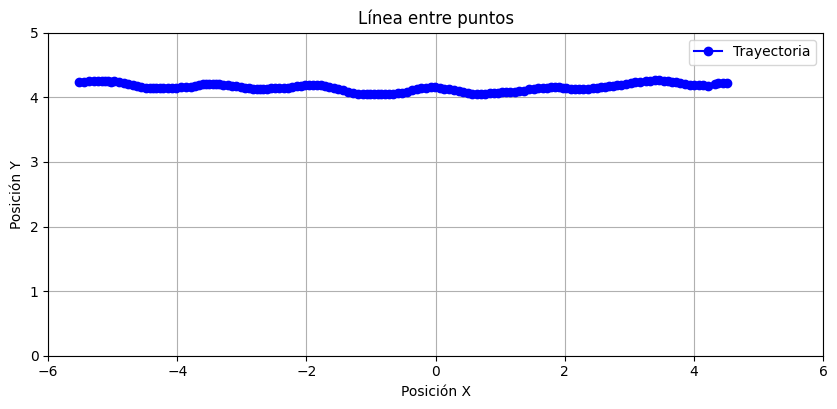

In [29]:
import matplotlib.pyplot as plt

# Extraer posiciones x e y
x_vals = [dato[1] for dato in persona_1]
y_vals = [dato[2] for dato in persona_1]

# Dibujar línea entre los dos puntos
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue', label='Trayectoria')

# Etiquetas en los puntos
#for i, dato in enumerate(persona_1):
#    ax.text(dato[1], dato[2] + 0.005, f"{dato[0]}", ha='center')

# Configuración del gráfico
ax.set_title("Línea entre puntos")
ax.set_xlabel("Posición X")
ax.set_ylabel("Posición Y")
ax.set_xlim(-6, 6)
ax.set_ylim(0, 5)
ax.grid(True)
ax.legend()
ax.set_aspect('equal')



## Histogramas

Como ejemplo, se visualizará todas las velocidades obtenidas por el peatón 1 en un gráfico de histograma. Con el fin de analizar el comportamiento de la persona 1.

Graficamos el histograma con 5 bins o divisiones.

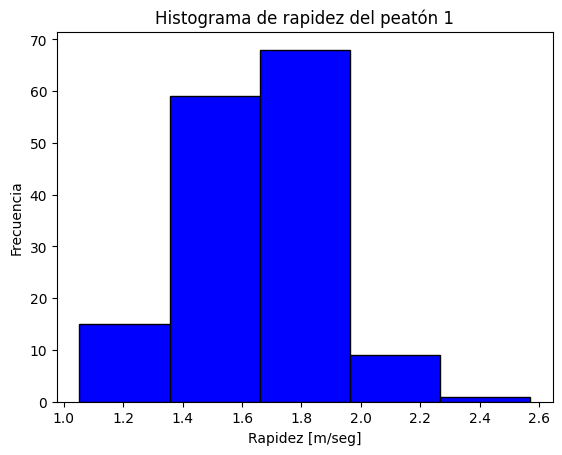

In [12]:
import matplotlib.pyplot as plt

# Crear un histograma
plt.hist(lista_rapidez_p1, bins=5, color='blue', edgecolor='black')  # bins define el número de intervalos

# Agregar títulos y etiquetas
plt.title('Histograma de rapidez del peatón 1')
plt.xlabel('Rapidez [m/seg]')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


Se puede apreciar que el peatøn tiende a caminar a una razón de 1.8 m/seg.

Si probamos más divisiones del histograma, por ejemplo bins=40, la tendencia se mantiene pero se puede ver con más detalle que las velocidades predominants son 1.6 y 1.0 m/s.

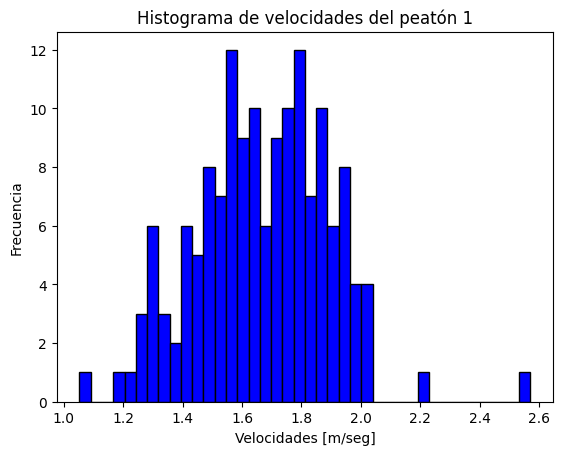

In [ ]:
import matplotlib.pyplot as plt

# Crear un histograma
plt.hist(velocidades_p1, bins=40, color='blue', edgecolor='black')  # bins define el número de intervalos

# Agregar títulos y etiquetas
plt.title('Histograma de velocidades del peatón 1')
plt.xlabel('Velocidades [m/seg]')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


#2. Problema

El laboratorio busca analizar el movimiento de peatones en un corredor unidireccional para comprender mejor la dinámica de flujo peatonal en entornos controlados. Utilizando un conjunto de datos específico, el laboratorio se enfoca en:

1. **Cargar y Preparar los Datos:** Importar los datos desde un archivo externo utilizando Python, con especial atención en extraer información relevante como marcas de tiempo y posiciones de cada peatón registrado.

2. **Análisis de Datos:**
   - **Cantidad de Peatones:** Determinar cuántos peatones participan en el experimento, contando el número de identificadores únicos de peatones en el dataset.
   - **Rapidez Media por Peatón:** Calcular la rapidez media para cada peatón individualmente. Esto implicará determinar la distancia total recorrida y el tiempo total empleado, luego calcular la rapidez promedio para cada uno.
   
3. **Visualización de Datos:**
   - **Histograma de Rapidez Media:** Crear un histograma para visualizar la distribución de la rapidez media de todos los peatones. Identificar la rapidez media dominante observando el peak (valor más alto) más prominente en el histograma.
   
4. **Cálculo de Rapidez Media Global:** Determinar la velocidad media de todos los peatones en el experimento, que será el promedio de todas las velocidades medias individuales.

### Objetivos Adicionales:
- **Interpretación de Resultados:** Discutir cómo los resultados pueden influir en el diseño de infraestructura peatonal y en la planificación de eventos masivos, basándose en las velocidades medias y las tendencias observadas en el histograma.

Este enfoque permitirá obtener una comprensión detallada de las características del flujo peatonal, crucial para mejoras en seguridad y eficiencia en entornos urbanos y otros espacios públicos.

## 1. Cargar y Preparar los Datos

### 1.1 Carga de archivos de textos de peatones

In [ ]:
# Montar unidad virtual desde google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd '/gdrive/MyDrive/PCIENTIFICA/lab02/dataset'

Mounted at /gdrive
/gdrive/MyDrive/PCIENTIFICA/lab02/dataset


In [ ]:
# Cargar archivo de texto en modo lectura (Con error explicar por qué)
with open('traj_UNI_CORR_500_05.txt', 'r') as archivo:
  # Lee el contenido del archivo
  peatones_txt = archivo.read()

In [ ]:
# Imprimimos el contenido del archivo
print(peatones_txt)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Cargar todos los peatones en una estructura de datos adecuada

### 1.2 Ordenar la lista por el número de frame

Para poder calcular la velocidad de una hay que considerar solo frame continuos.

In [ ]:
# Ordenar los frames en orden consecutivos para todos los peatones

##2. Análisis de Datos

**Cantidad de Peatones:** Determinar cuántos peatones participan en el experimento, contando el número de identificadores únicos de peatones en el dataset.

**Velocidad Media por Peatón:** Calcular la velocidad media para cada peatón individualmente. Esto implicará determinar la distancia total recorrida y el tiempo total empleado, luego calcular la velocidad promedio para cada uno.


In [ ]:
# Calcular la cantidad de peatones que hay en el dataset

In [ ]:
# Calcular la velocidad media de cada peaton

##3. Visualización de Datos

 Crear un histograma para visualizar la distribución de las velocidades medias de todos los peatones. Identificar la velocidad media dominante observando el peak (valor más alto) más prominente en el histograma.



In [ ]:
# Graficar histograma

##4. Cálculo de Velocidad Media Global

Determinar la velocidad media de todos los peatones en el experimento, que será el promedio de todas las velocidades medias individuales.

In [ ]:
# Calcular la velocidad media de todos los peatones

#Reporte

##1. Resultados

Usar tablas y gráficos para explicar los resultados obtenidos.

| **Modelo** | **Función de Similitud** | **Accuracy** (Tasa de acierto) |
|---|---|---|
| 01 | Coseno |  |
| 02 | Euclídea |  |
|  |  |  |
|  |  |  |
|  |  |  |

###Modelos

*   01: Explicar brevemente como se entrenó el modelo 01.
*   02: Explicar brevemente como se entrenó el modelo 02.
*   ...
*   0n: Explicar brevemente como se entrenó el modelo n.



##2. Conclusiones

Que puede deducir de los resultados obtenidos.

*   ¿Qué estrutura de datos es mejor para resolver este problema?
*   ¿Qué mejoraría en la implementación de este problema?
*   ¿Cual es rendimiento computacional (espacio y tiempo) de este problema?
*   ¿Qué se puede inferir del comportamiento de los peatones en este tipo de problemas?


